# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./train.csv')

## 1. 분석의 목적과 변수 확인

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [10]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

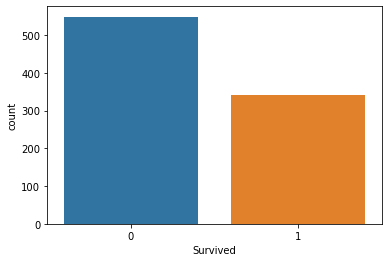

In [11]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

In [13]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

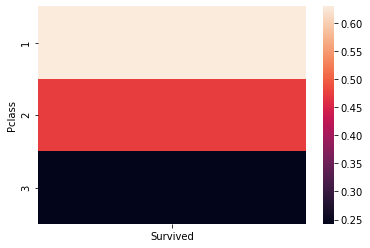

In [16]:
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

In [17]:
titanic_df[['Survived', 'Sex']].groupby(['Survived']).count()

,Sex
Survived,
0,549
1,342


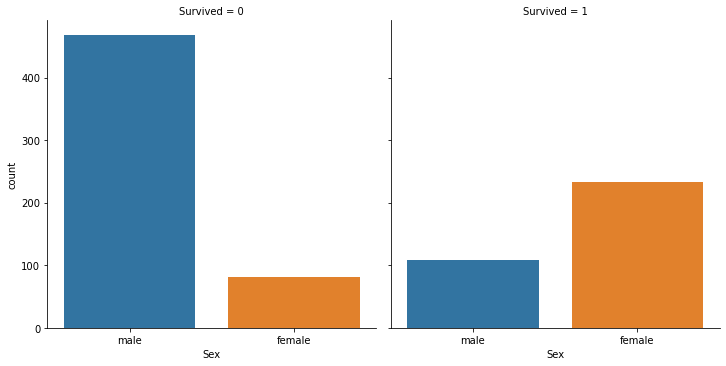

In [19]:
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

In [20]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

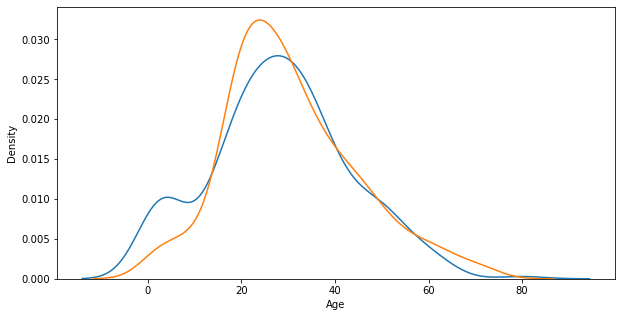

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax = ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax = ax)
plt.show()

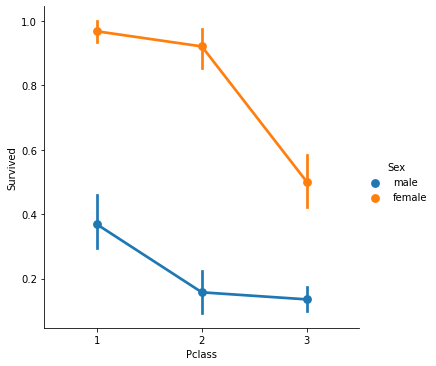

In [24]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

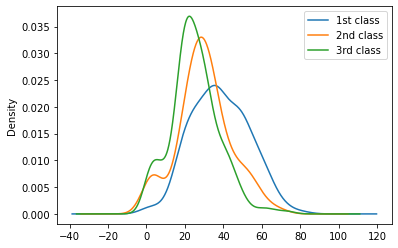

In [26]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

## SibSp

In [31]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

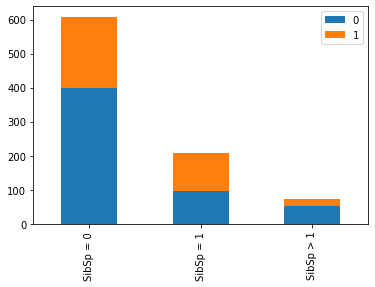

In [39]:
SibSp_case1 = titanic_df[titanic_df.SibSp == 0]['Survived'].value_counts()
SibSp_case2 = titanic_df[titanic_df.SibSp == 1]['Survived'].value_counts()
SibSp_case3 = titanic_df[titanic_df.SibSp > 1]['Survived'].value_counts()
SibSp_cases = pd.DataFrame([SibSp_case1, SibSp_case2, SibSp_case3])
SibSp_cases.index = ['SibSp = 0', 'SibSp = 1', 'SibSp > 1']
SibSp_cases.plot(kind = 'bar', stacked=True)
plt.show()

함께 탄 가족(사촌, 배우자)이 없거나 1명인 경우는 그나마 살 수 있는 확률이 있었지만,
2명 이상인 경우에는 살아남지 못할 확률이 압도적으로 많았다.


## Fare

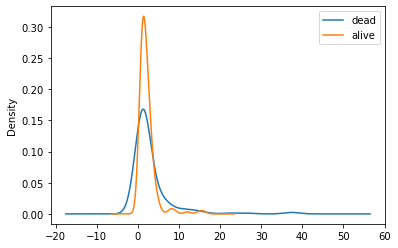

In [86]:
dead = titanic_df[titanic_df.Survived == 0]['Fare'].value_counts()
alive = titanic_df[titanic_df.Survived == 1]['Fare'].value_counts()
dead.plot(kind='kde', label='dead')
alive.plot(kind='kde', label='alive')
plt.legend()
plt.show()

가격이 어느 정도 낮을 때는 살아난 사람의 비율이 많지만, 그 이상으로 갈수록 살아난 사람보다 그렇지 않은 사람의 비율이 더 커진다.

## Parch

In [87]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

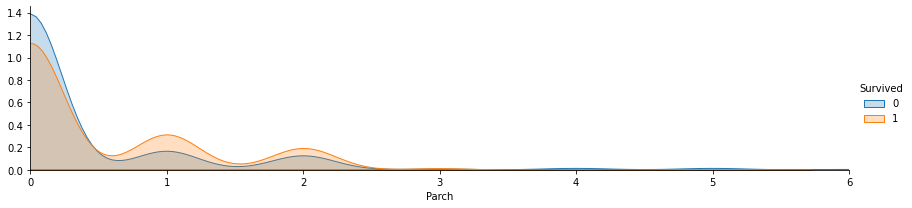

In [76]:
facet = sns.FacetGrid(titanic_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Parch', shade=True)
facet.set(xlim=(titanic_df['Parch'].min(), titanic_df['Parch'].max()))
facet.add_legend()

plt.show()

가족(parent, children)과 같이 타지않은 경우 살아난 확률이 더 높았다.

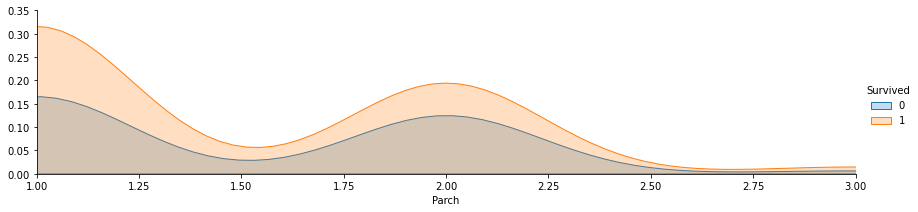

In [83]:
facet = sns.FacetGrid(titanic_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Parch', shade=True)
facet.set(xlim=(1, 3), ylim=(0, 0.35))
facet.add_legend()

plt.show()

그에 비해 가족과 함께 탄 경우는 살아남지 못할 확률이 더 높다.